# Análisis de a9a

In [17]:
import pandas as pd
from plotting import plot_comparatives
from utils import extract_parameters, sort_dataframe_by

database = 'a9a'
cv = 5

df_nystrom_and_svm = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_svm_classification_{database}_cv_5.csv')
df_nn = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/neural_network_classification_{database}_cv_5.txt')
df_nystrom_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_ridge_classification_{database}_cv_5.txt')
df_rbf_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/RBF_and_ridge_classification_{database}_cv_5.txt')
#df_rbf_and_svm = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/RBF_and_svm_classification_{database}_cv_5.txt')

file_path_for_ksvm = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/KSVM_classification_a9a_cv_5.txt'
file_path_for_kernel_ridge_classification = f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/kernel_ridge_classification_{database}_cv_{cv}.txt'


df_with_n_components = [df_nystrom_and_ridge, df_rbf_and_ridge, df_nystrom_and_svm]
df_labels = ['Nyström and ridge classification', 'RFF and ridge classification', 'Nystrom and svm classification']

damping_formula = lambda accuracy, time : accuracy / time *100
damping_column = 'damping'
for df in df_with_n_components:
    df['damping'] = damping_formula(df.accuracy_test,df.training_time)


In [18]:
# get KSVM data
best_params_ksvm, training_time_ksvm, test_accuracy_ksvm = extract_parameters(file_path_for_ksvm)
best_params_krc, training_time_krc, test_accuracy_krc = extract_parameters(file_path_for_kernel_ridge_classification)

damping_ksvm = damping_formula(float(test_accuracy_ksvm),float(training_time_ksvm))
damping_krc = damping_formula(float(test_accuracy_krc),float(training_time_krc))

constant_values = {
    'model': ['KSVM', 'Kernel ridge classification'],
    "training_time" : [training_time_ksvm, training_time_krc],
    'accuracy_test' : [test_accuracy_ksvm, test_accuracy_krc],
    'damping': [damping_ksvm, damping_krc],
    'best_params' : [best_params_ksvm, best_params_krc]
}
df_basic_models = pd.DataFrame(constant_values)

df_basic_models

,model,training_time,accuracy_test,damping,best_params
0,KSVM,59.805290,0.850992,1.422938,"{'svm__C': 316.22776601683796, 'svm__gamma': 8..."
1,Kernel ridge classification,1475.277848,0.733554,0.049723,"{'ridge_classification__alpha': 100.0, 'ridge_..."


In [19]:
# Concatenate the data frames while adding the model information
df_results = pd.concat([
    df_nystrom_and_ridge.assign(model="nystrom_and_ridge of n_comp. "+df_nystrom_and_ridge["n_components"].astype(str)),
    df_rbf_and_ridge.assign(model="rbf_and_ridge of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_nystrom_and_svm.assign(model="nystrom_and_svm of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_basic_models
], ignore_index=True)



# Reorder the columns as per your requirement
df_results = df_results[["model", "training_time", "accuracy_test", "damping", "best_params"]]

# Print the unified data frame
df_results

,model,training_time,accuracy_test,damping,best_params
0,nystrom_and_ridge of n_comp. 10,0.214731,0.791045,368.389573,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
1,nystrom_and_ridge of n_comp. 20,0.194165,0.819483,422.055404,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
2,nystrom_and_ridge of n_comp. 50,0.336913,0.844051,250.525113,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
3,nystrom_and_ridge of n_comp. 100,0.488412,0.847000,173.419024,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
4,nystrom_and_ridge of n_comp. 200,0.733879,0.848412,115.606507,"{'nystroem__gamma': 0.0010162601626016261, 'ri..."
5,nystrom_and_ridge of n_comp. 500,1.563415,0.849518,54.337337,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
6,nystrom_and_ridge of n_comp. 1000,3.150516,0.849825,26.974151,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
7,rbf_and_ridge of n_comp. 10,0.166927,0.771881,462.405586,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
8,rbf_and_ridge of n_comp. 20,0.213646,0.781402,365.745672,"{'rbf_sampler__gamma': 0.0010162601626016261, ..."
9,rbf_and_ridge of n_comp. 50,0.257184,0.829003,322.338497,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."


In [20]:
ranking_size = 10

# Damping 


In [21]:
column_name = 'damping'
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  damping


,model,training_time,accuracy_test,damping,best_params
7,rbf_and_ridge of n_comp. 10,0.166927,0.771881,462.405586,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
1,nystrom_and_ridge of n_comp. 20,0.194165,0.819483,422.055404,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
0,nystrom_and_ridge of n_comp. 10,0.214731,0.791045,368.389573,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
8,rbf_and_ridge of n_comp. 20,0.213646,0.781402,365.745672,"{'rbf_sampler__gamma': 0.0010162601626016261, ..."
9,rbf_and_ridge of n_comp. 50,0.257184,0.829003,322.338497,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
10,rbf_and_ridge of n_comp. 100,0.323858,0.840980,259.675224,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
2,nystrom_and_ridge of n_comp. 50,0.336913,0.844051,250.525113,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
3,nystrom_and_ridge of n_comp. 100,0.488412,0.847000,173.419024,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
4,nystrom_and_ridge of n_comp. 200,0.733879,0.848412,115.606507,"{'nystroem__gamma': 0.0010162601626016261, 'ri..."
11,rbf_and_ridge of n_comp. 200,0.751943,0.845710,112.469872,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."


## Accuracy on test

In [22]:
column_name = "accuracy_test"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  accuracy_test


,model,training_time,accuracy_test,damping,best_params
21,KSVM,59.805290,0.850992,1.422938,"{'svm__C': 316.22776601683796, 'svm__gamma': 8..."
20,nystrom_and_svm of n_comp. 1000,335.877148,0.850685,0.253273,"{'nystroem__gamma': 8.982555655316915e-05, 'sv..."
19,nystrom_and_svm of n_comp. 500,184.231867,0.850378,0.461580,"{'nystroem__gamma': 8.982555655316915e-05, 'sv..."
18,nystrom_and_svm of n_comp. 200,71.193979,0.850071,1.194020,"{'nystroem__gamma': 8.982555655316915e-05, 'sv..."
6,nystrom_and_ridge of n_comp. 1000,3.150516,0.849825,26.974151,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
17,nystrom_and_svm of n_comp. 100,27.424568,0.849518,3.097653,"{'nystroem__gamma': 8.982555655316915e-05, 'sv..."
5,nystrom_and_ridge of n_comp. 500,1.563415,0.849518,54.337337,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
16,nystrom_and_svm of n_comp. 50,16.782042,0.848597,5.056575,"{'nystroem__gamma': 0.0010162601626016261, 'sv..."
4,nystrom_and_ridge of n_comp. 200,0.733879,0.848412,115.606507,"{'nystroem__gamma': 0.0010162601626016261, 'ri..."
12,rbf_and_ridge of n_comp. 500,1.556815,0.847675,54.449316,"{'rbf_sampler__gamma': 8.982555655316915e-05, ..."


# Ranking by time

In [31]:
column_name = "training_time"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=True)

Sort by  training_time


,model,training_time,accuracy_test,damping,best_params
7,rbf_and_ridge of n_comp. 10,0.166927,0.771881,462.405586,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
1,nystrom_and_ridge of n_comp. 20,0.194165,0.819483,422.055404,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
8,rbf_and_ridge of n_comp. 20,0.213646,0.781402,365.745672,"{'rbf_sampler__gamma': 0.0010162601626016261, ..."
0,nystrom_and_ridge of n_comp. 10,0.214731,0.791045,368.389573,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
9,rbf_and_ridge of n_comp. 50,0.257184,0.829003,322.338497,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
10,rbf_and_ridge of n_comp. 100,0.323858,0.840980,259.675224,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
2,nystrom_and_ridge of n_comp. 50,0.336913,0.844051,250.525113,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
3,nystrom_and_ridge of n_comp. 100,0.488412,0.847000,173.419024,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
4,nystrom_and_ridge of n_comp. 200,0.733879,0.848412,115.606507,"{'nystroem__gamma': 0.0010162601626016261, 'ri..."
11,rbf_and_ridge of n_comp. 200,0.751943,0.845710,112.469872,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."


# Plotting 


Analysis of training_time


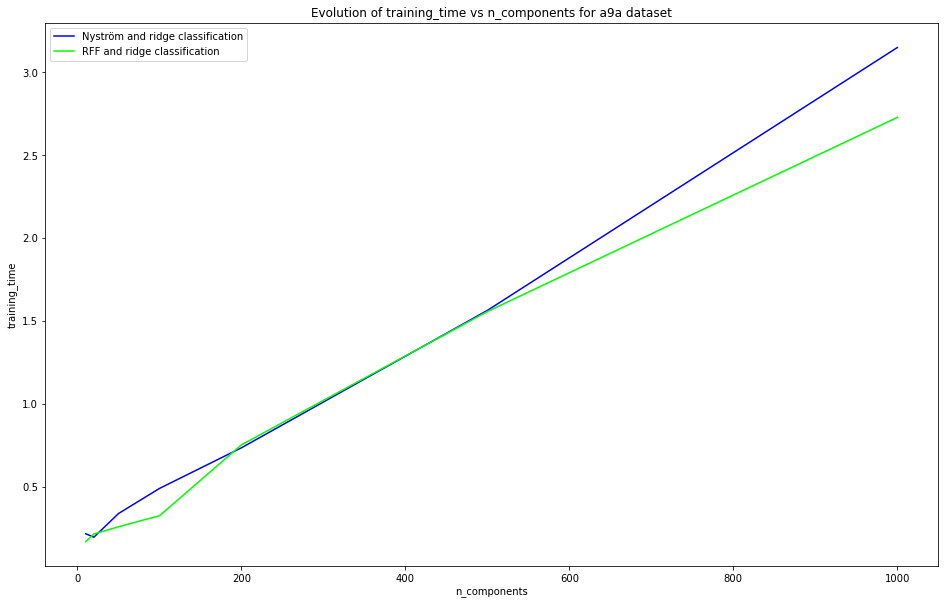

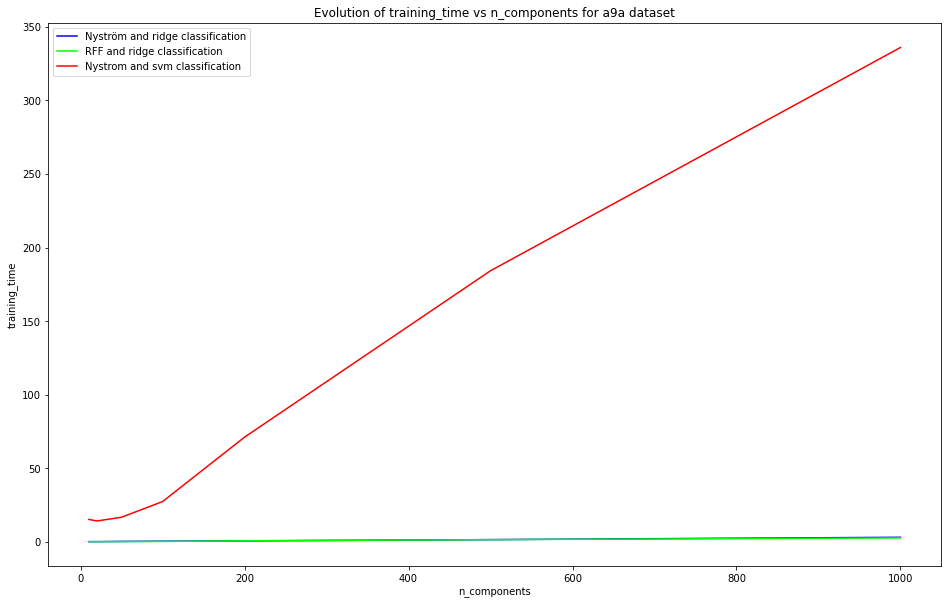

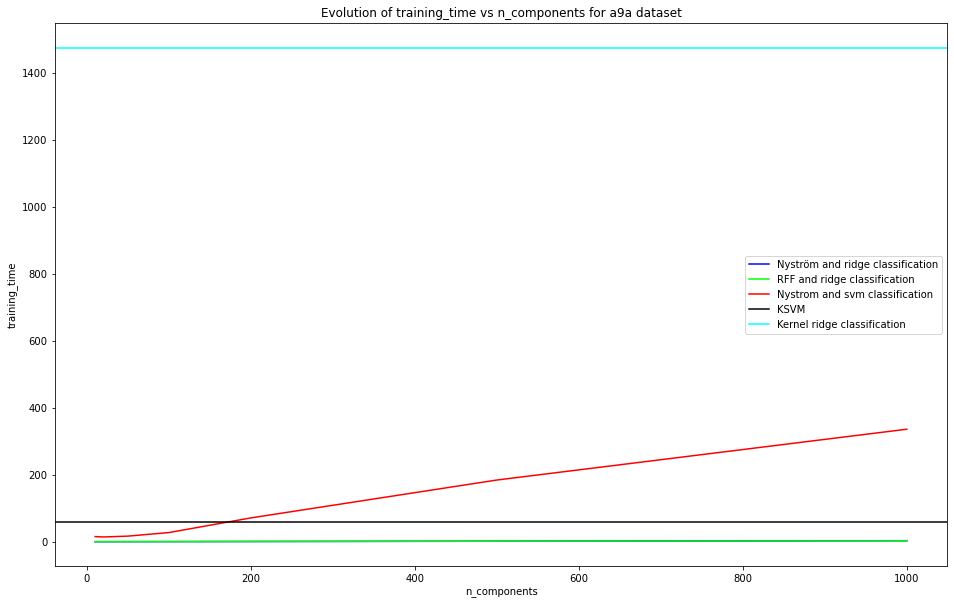

Analysis of accuracy_test


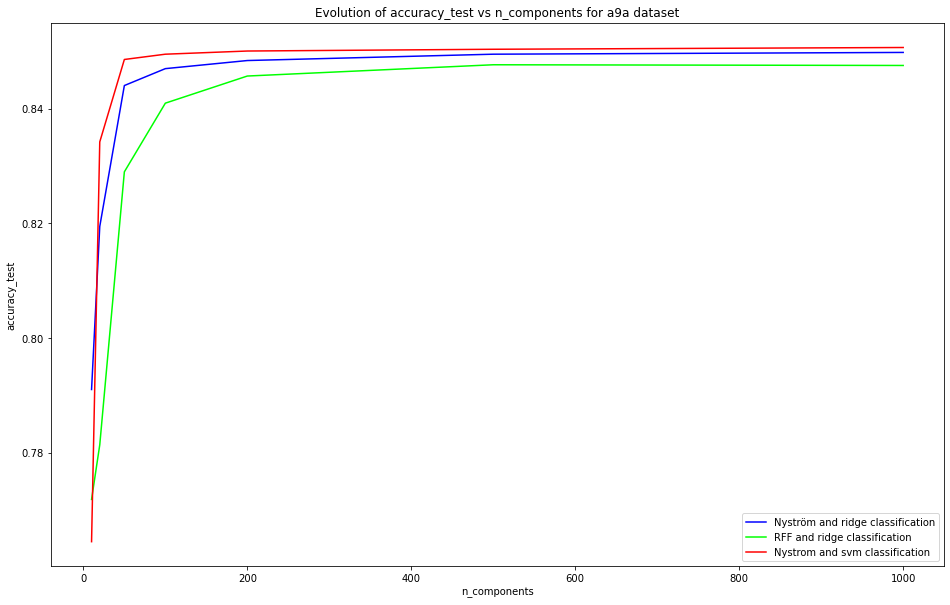

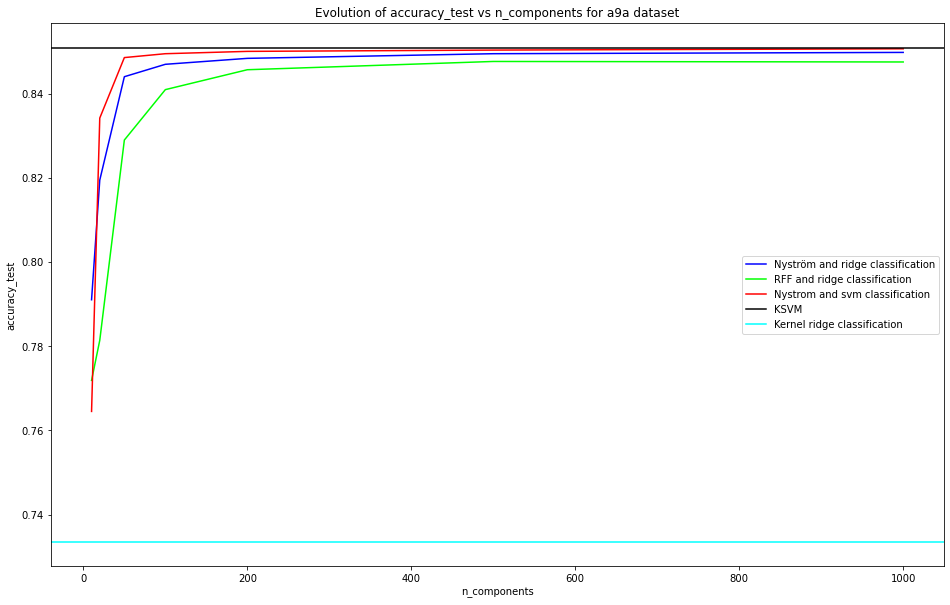

Analysis of damping


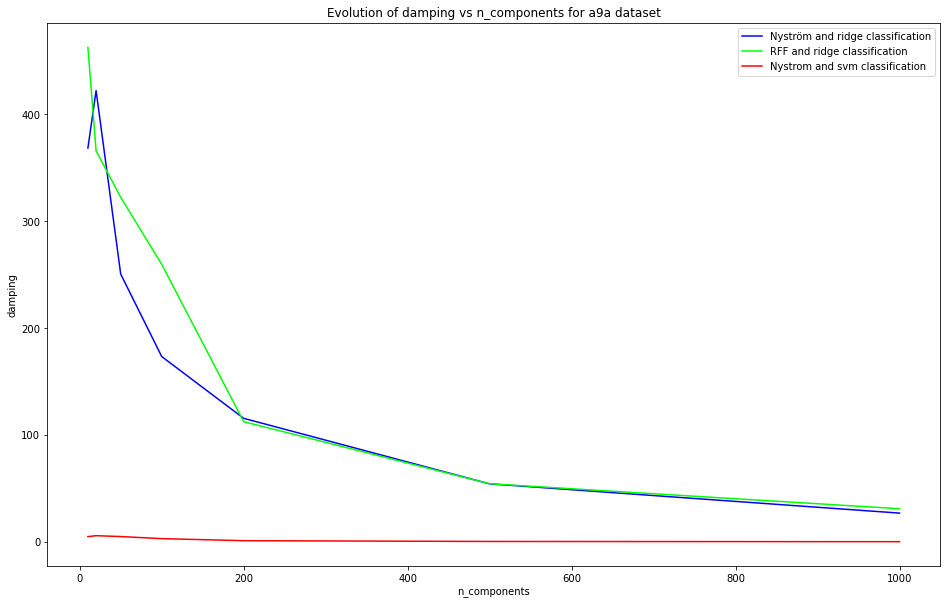

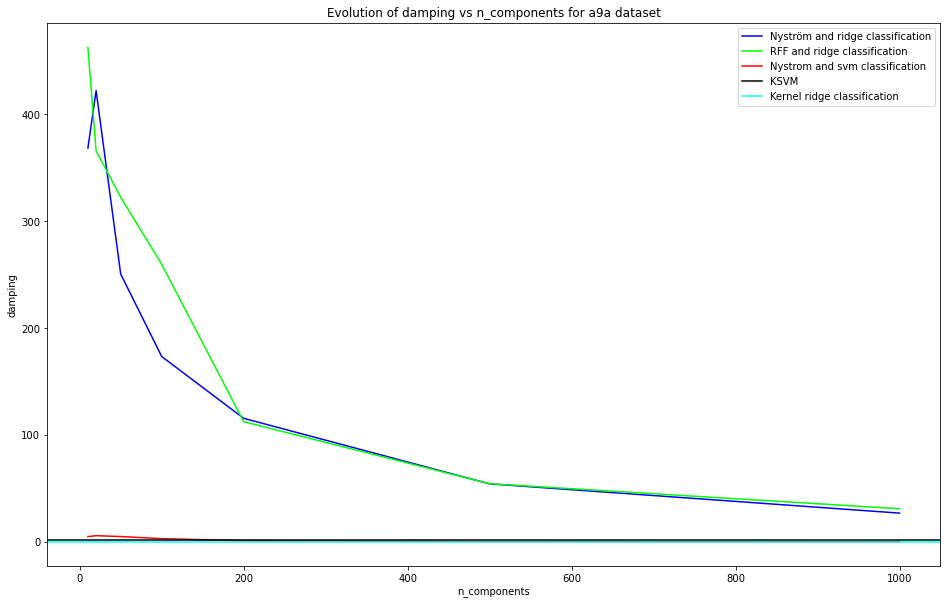

In [24]:

for column in ['training_time', 'accuracy_test', 'damping']:
    title = f'Evolution of {column} vs n_components for {database} dataset'
    print(f'Analysis of {column}')
    if column == 'training_time':
        plot_comparatives(column=column, df_with_n_components=df_with_n_components[:-1], df_labels=df_labels[:-1], title=title)
    plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
    plot_comparatives(column, df_with_n_components, df_labels, title, df_basic_models[column], df_basic_models['model'] , False)



In [25]:
nn_accuracy = df_nn.accuracy_test.to_list()
nn_training_time = df_nn.training_time.to_list()
nn_labels = list(map(lambda x: 'NN of shape '+str(x),df_nn.hidden_layer_sizes.to_list()))
df_nn.head()



,hidden_layer_sizes,best_params,best_accuracy_cv,training_time,accuracy_test,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp_classification__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,"(20000,)",{'mlp_classification__alpha': 1.0},0.848838,978.511512,0.851053,[2236.79129443 2595.93281002 2392.84557304 341...,[5.13519161e+02 2.31519180e+02 5.46123320e+02 ...,[ 1.7891417 1.88607588 1.92689934 1.833892...,[0.11530421 0.0825361 0.12113651 0.49848852 0...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.80561953 0.81145402 0.80623369 0.80577307 0...,[0.81572482 0.81649263 0.82171376 0.81587838 0...,[0.81864251 0.82294226 0.81464988 0.81695332 0...,[0.81787469 0.81726044 0.82355651 0.82094595 0...,[0.8227887 0.81971744 0.81603194 0.82017813 0...,[0.81613005 0.81757336 0.81643715 0.81594577 0...,[5.73287095e-03 3.79827516e-03 6.09913294e-03 ...,[7 5 6 8 4 3 1 2 9 9 9 9 9 9]
1,"(141, 141)",{'mlp_classification__alpha': 1.0},0.846811,35.615685,0.846570,[55.01855102 71.25109944 55.6065217 55.040335...,[ 6.44965726 12.44416741 12.56136274 8.351517...,[0.03813205 0.03819232 0.03580923 0.03631101 0...,[0.00155204 0.0013802 0.00354309 0.00115906 0...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.8039306 0.80270229 0.80377706 0.8031629 0...,[0.80850737 0.80190418 0.80850737 0.80666462 0...,[0.80328624 0.81511057 0.81557125 0.81280713 0...,[0.81679975 0.80973587 0.81142506 0.81480344 0...,[0.81649263 0.81265356 0.81679975 0.8112715 0...,[0.80980332 0.80842129 0.8112161 0.80974192 0...,[5.87090435e-03 5.28330218e-03 4.75109942e-03 ...,[6 8 5 7 4 3 1 2 9 9 9 9 9 9]
2,"(27, 27, 27)",{'mlp_classification__alpha': 1.0},0.847271,19.370672,0.847430,[68.75050168 74.73460937 78.78191433 86.511458...,[ 2.6066683 10.79266137 12.74077879 21.580773...,[0.01696496 0.01680293 0.01698532 0.01740627 0...,[4.94780316e-04 1.13862328e-03 8.99482334e-04 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.80178105 0.79886381 0.80224167 0.8011669 0...,[0.79821867 0.80620393 0.80451474 0.80251843 0...,[0.81065725 0.81050369 0.80942875 0.80835381 0...,[0.81234644 0.81142506 0.81357494 0.81173219 0...,[0.80973587 0.81188575 0.81434275 0.81035012 0...,[0.80654786 0.80777645 0.80882057 0.80682429 0...,[5.52759968e-03 4.88967223e-03 4.80188432e-03 ...,[8 6 5 7 4 3 1 2 9 9 9 9 9 9]


In [26]:
nn_accuracy,nn_training_time,nn_labels

([0.8510533750998096, 0.8465696210306493, 0.8474295190713101],
 [978.511512041092, 35.615684509277344, 19.37067198753357],
 ['NN of shape (20000,)',
  'NN of shape (141, 141)',
  'NN of shape (27, 27, 27)'])

In [27]:
from plotting import plot_comparatives

# Time analysis adults data set

Conclusion: Radom features win. 

Use Wilcolxon .

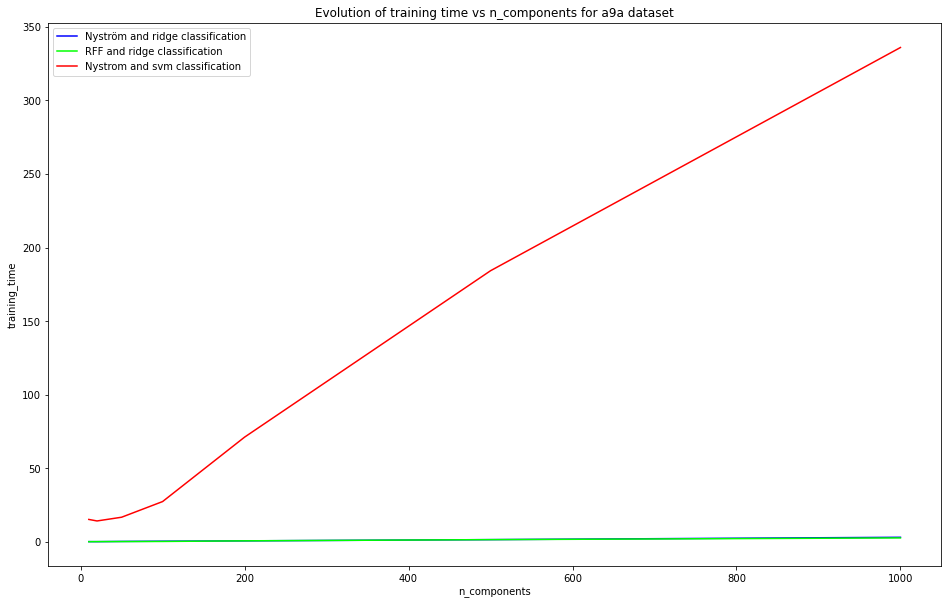

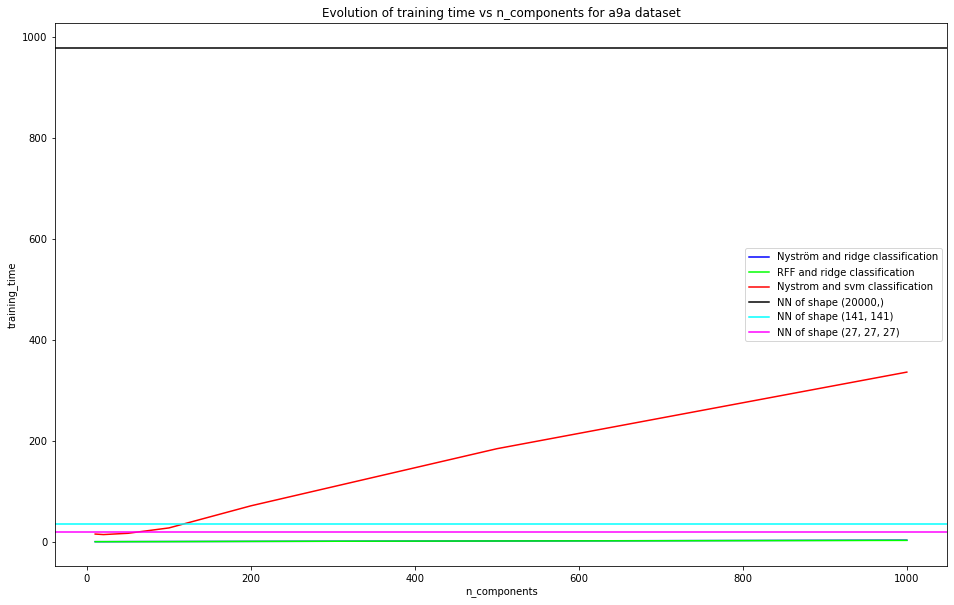

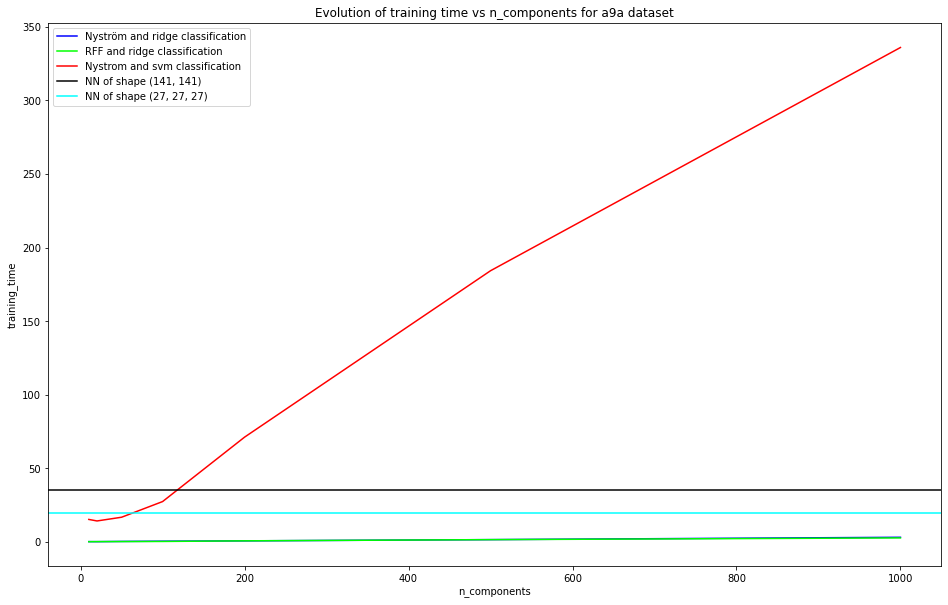

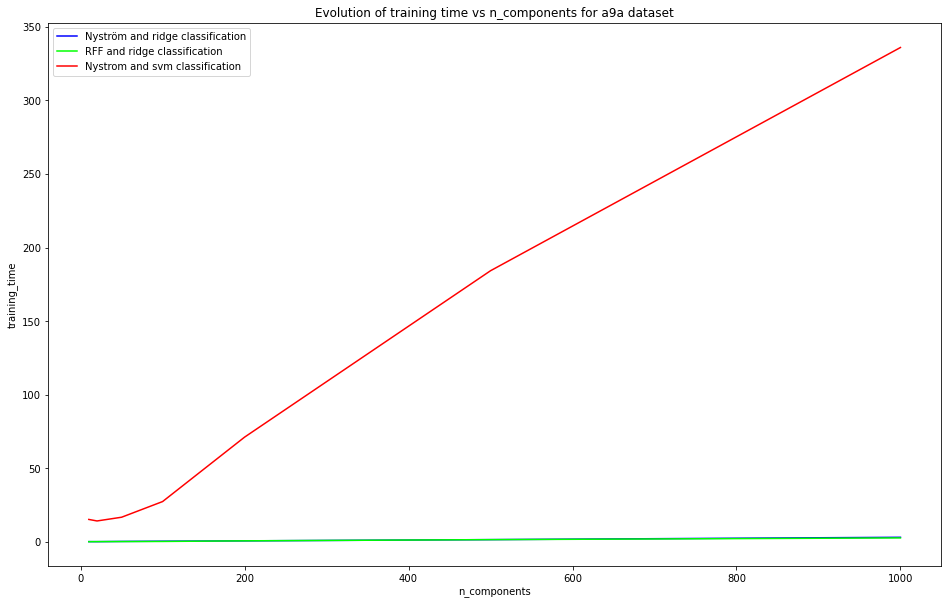

In [28]:

column = 'training_time'
title = f'Evolution of training time vs n_components for {database} dataset'

plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[2:-1], nn_labels[2:-1], False)

# TODO  
# usar intelet

# Accuracy 

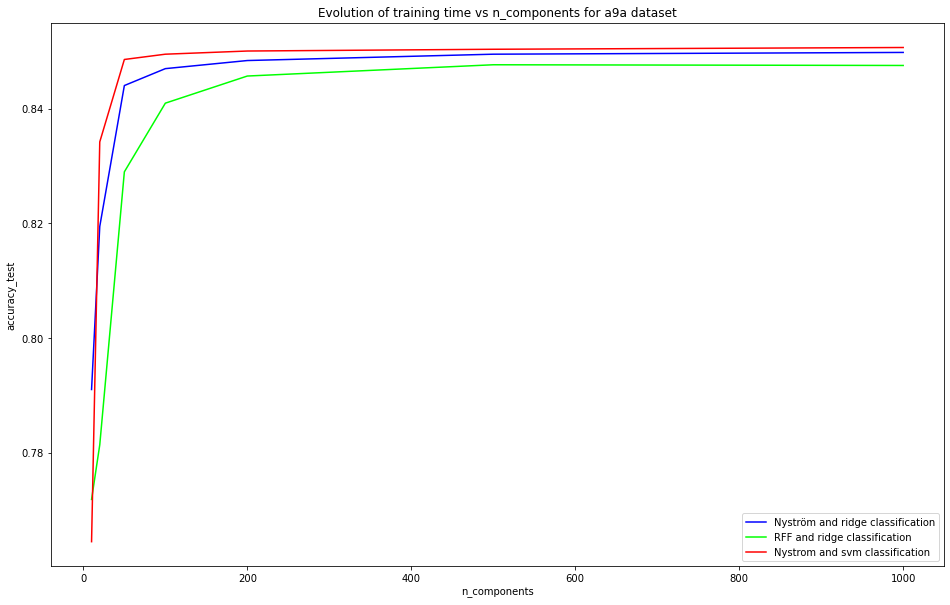

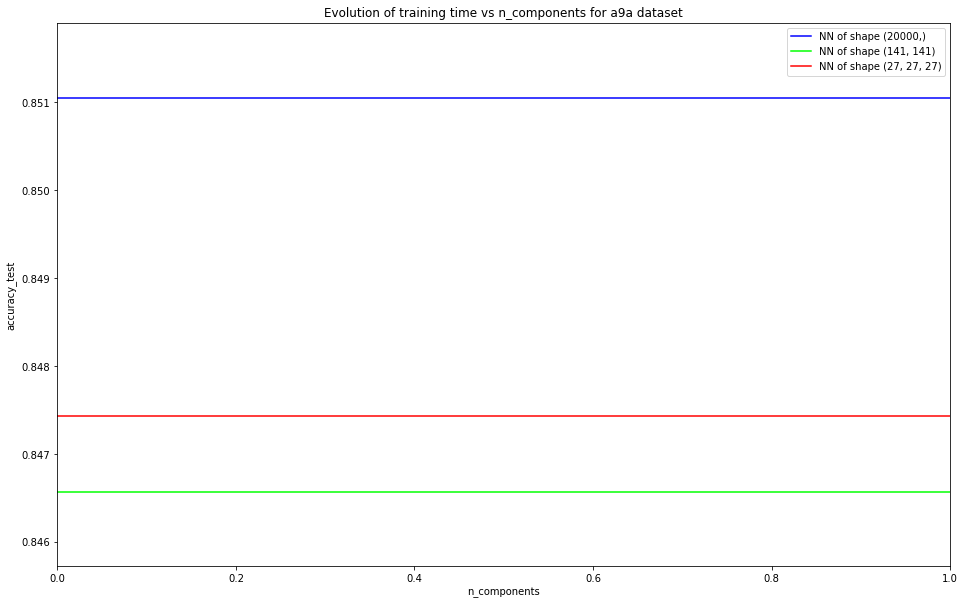

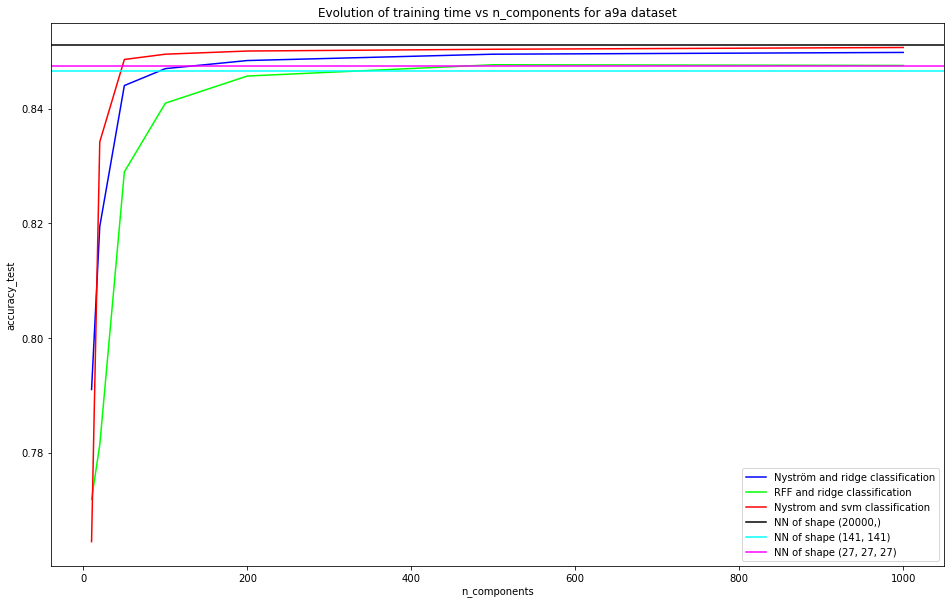

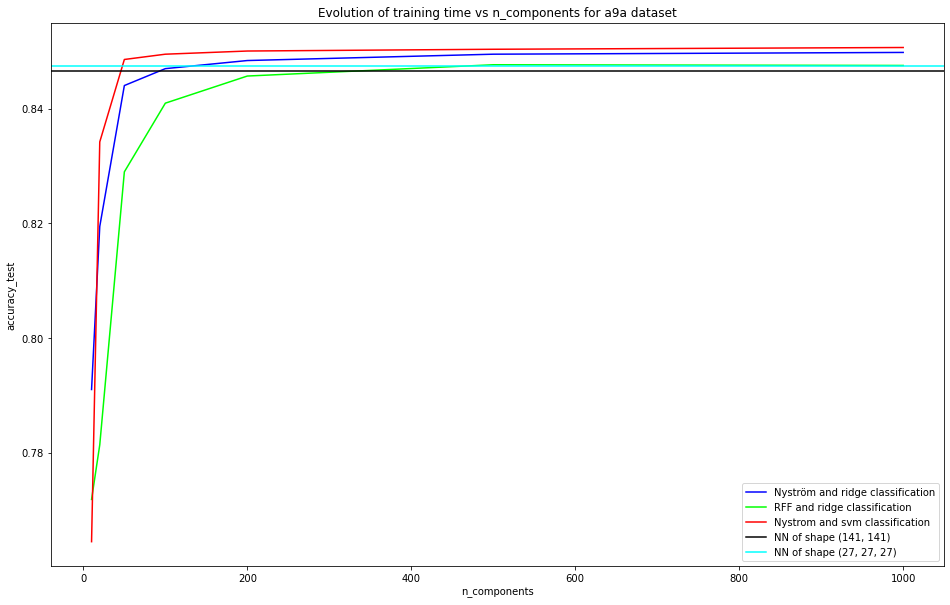

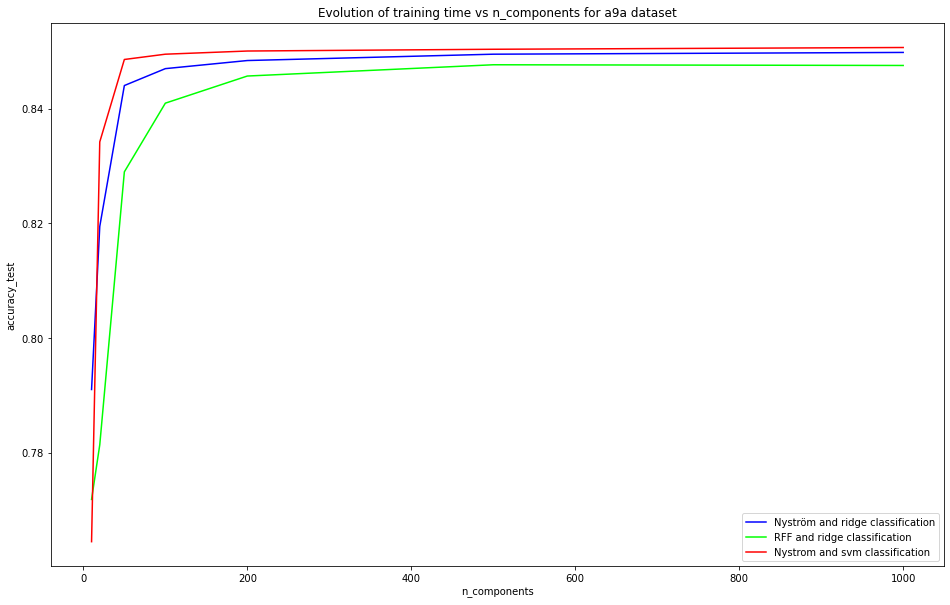

In [29]:
column = 'accuracy_test'

#df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
#title = 'Evolution of accuracy vs n_components for a9a dataset'
constant_data = nn_accuracy
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[2:-1], nn_labels[2:-1], False)


# Damping


Formula: 

$$damping = \frac{accuracy}{time} \times 100$$

The bigger the best

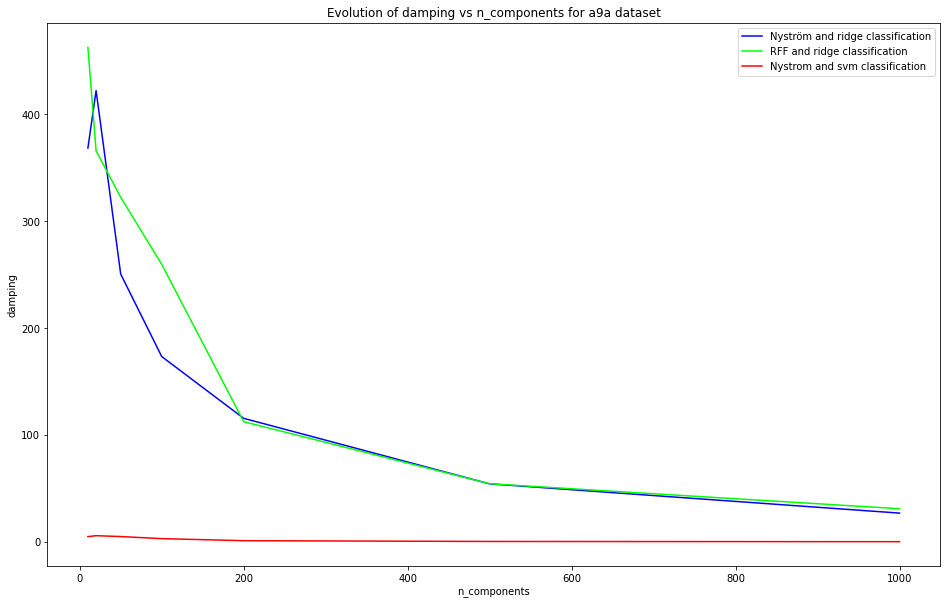

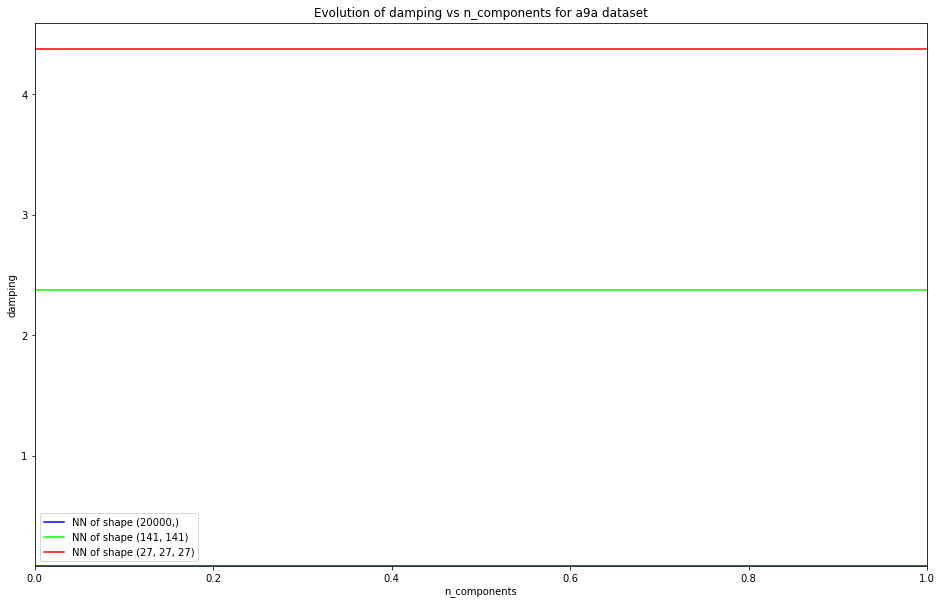

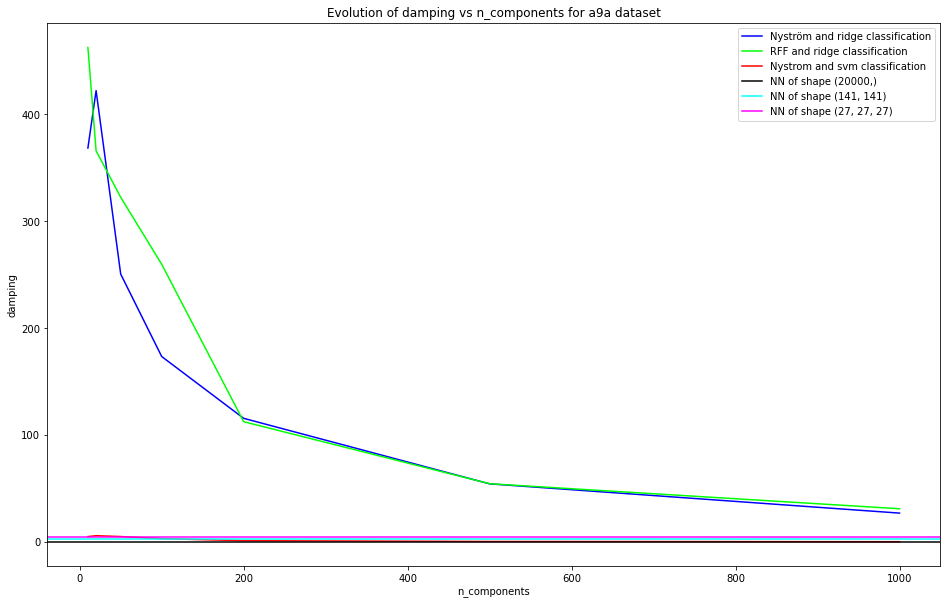

In [30]:
# Computing damping
constant_damping = [acc / time*100 for acc,time in zip(nn_accuracy, nn_training_time)]

# Plotting

column = damping_column
title = f'Evolution of damping vs n_components for {database} dataset'
constant_data = constant_damping
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False, constant_margin=0.05)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)